# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

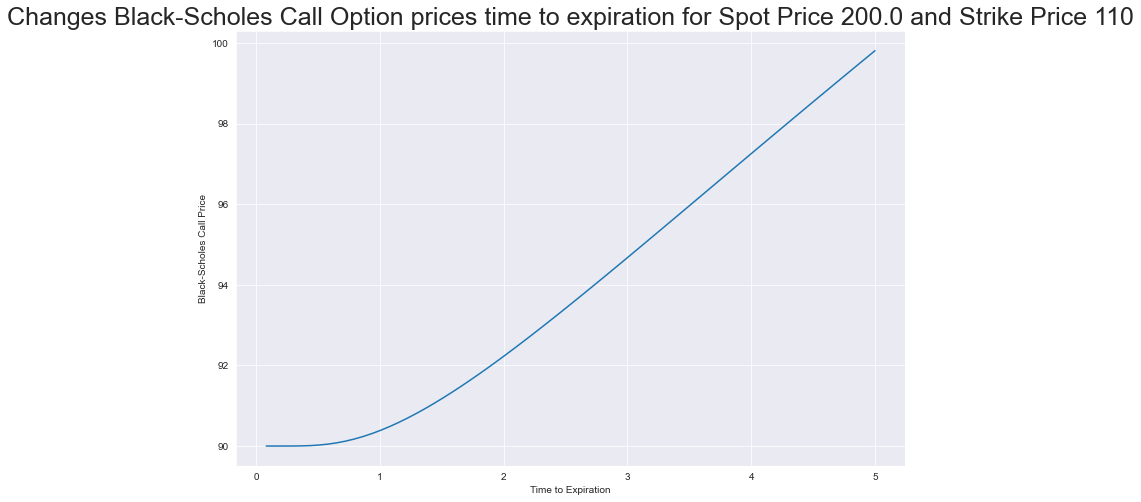

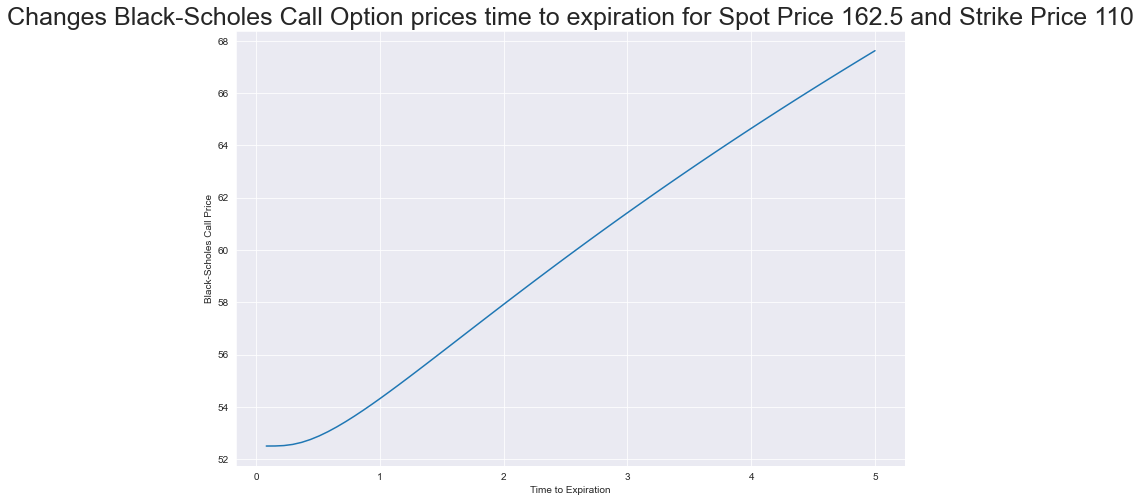

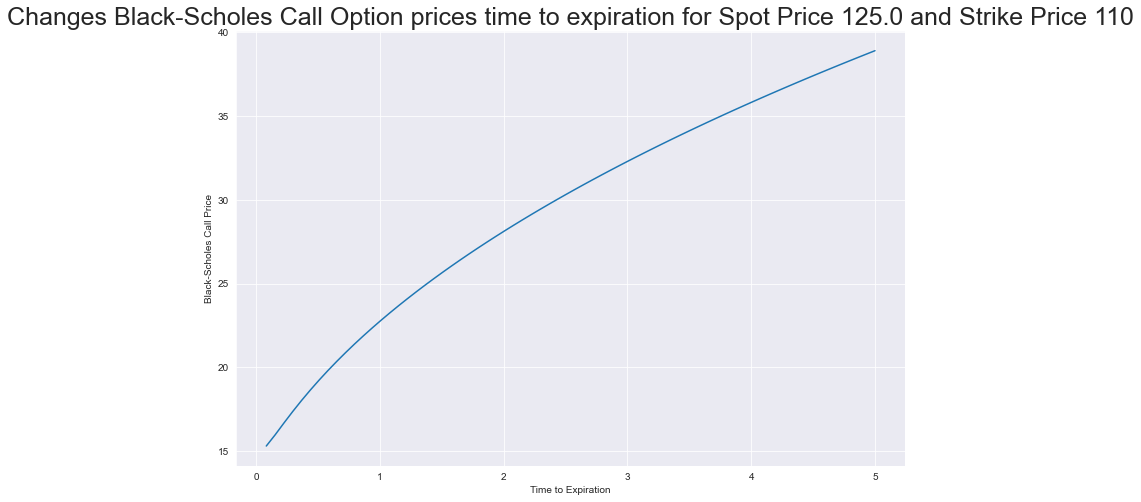

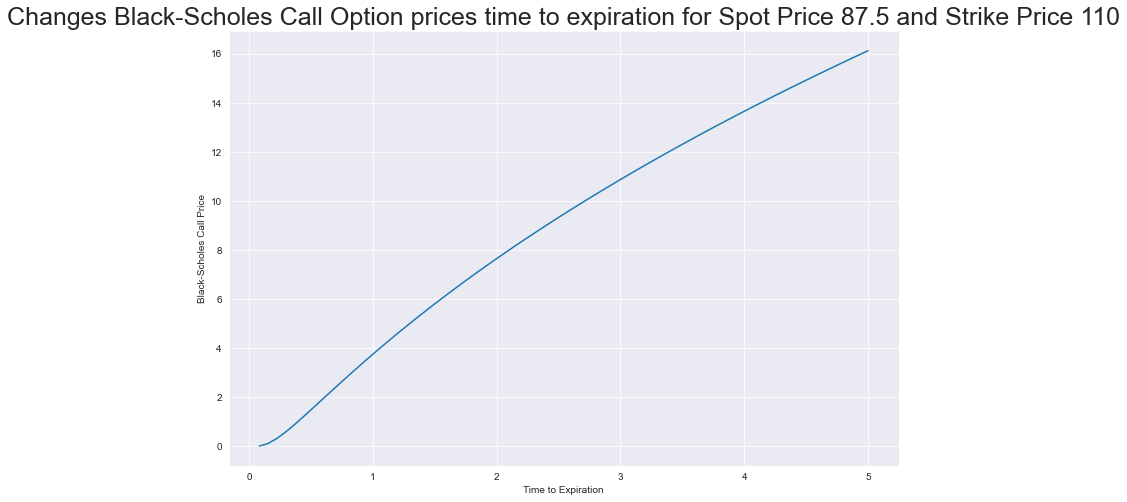

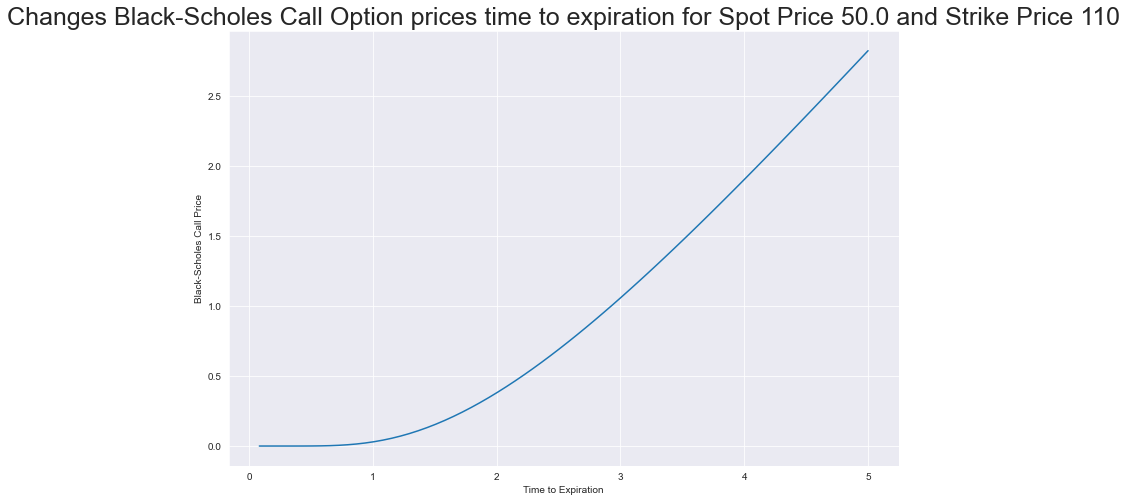

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)

def bs_call_delta(S0, K, sigma, t, r):
    """
    Returns the Delta (sensitivity to spot price) of a European call option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Call Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1)

def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


def bs_put_delta(S0, K, sigma, t, r):
    """
    Returns the Delta (sensitivity to spot price) of a European put option
    under Black-Scholes assumptions.

    Parameters:
        S0 (float): Initial stock price
        K (float): Strike price
        sigma (float): Volatility of the stock
        t (float): Time to maturity (in years)
        r (float): Risk-free interest rate

    Returns:
        float: Delta of Put Option
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1) - 1.


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)

spot_prices = np.linspace(200, 50, 5)


for spot_price in spot_prices:
    call_prices = [bs_call(spot_price,K,sigma, t = times[i]) for i in range(len(times))]
    plt.figure(figsize = (12,8))
    plt.title(f'Changes Black-Scholes Call Option prices time to expiration for Spot Price {spot_price} and Strike Price {K}', size = 25)

    plt.plot(times, call_prices)

    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Call Price')
    plt.show()


a)
Call option premiums are highest when the spot price is well above the strike price, as the option is deep in-the-money and gives the right to buy below market value. As the spot price approaches the strike, the premium decreases because the likelihood of profit is lower. When the spot is below the strike, the premium drops further since the option is out-of-the-money and unlikely to be exercised. Additionally, call option prices increase as time to expiration increases. More time introduces greater uncertainty and potential for favorable movements, which adds value to the option.

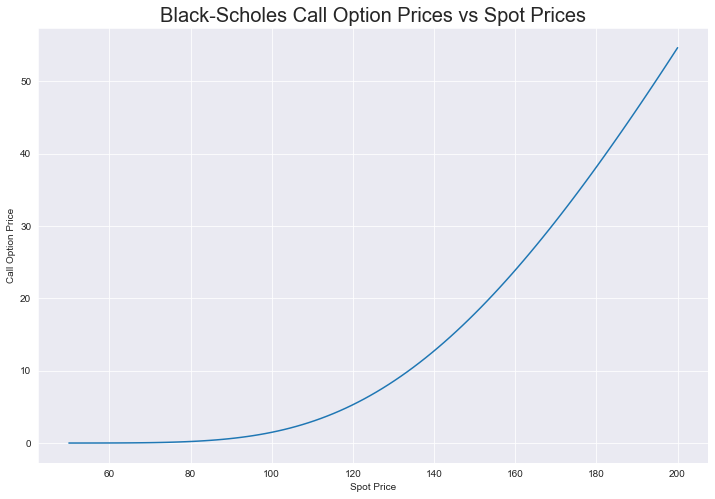

In [14]:
spot_prices = np.linspace(50, 200, 100)
call_prices = [bs_call(S, K, sigma, t=1) for S in spot_prices]

plt.figure(figsize=(12, 8))
plt.title('Black-Scholes Call Option Prices vs Spot Prices', size=20)
plt.plot(spot_prices, call_prices)
plt.xlabel('Spot Price')
plt.ylabel('Call Option Price')
plt.show()

b) The call price increases as the spot price increases. 

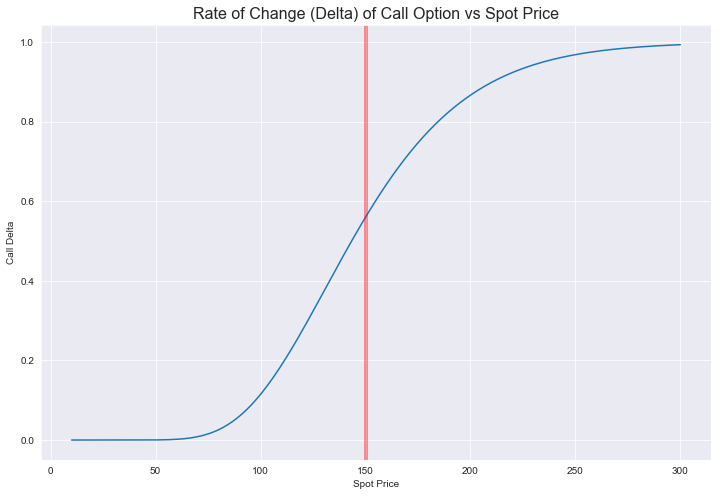

In [15]:
spot_prices = np.linspace(10, 300, 200)
call_deltas = [bs_call_delta(S, K, sigma, t=1, r=0) for S in spot_prices]

plt.figure(figsize=(12, 8))
plt.plot(spot_prices, call_deltas)
plt.axvline(K,color='red',label='Strike Price',alpha=.4, linewidth=4)
plt.title("Rate of Change (Delta) of Call Option vs Spot Price", fontsize=16)
plt.xlabel("Spot Price")
plt.ylabel("Call Delta")
plt.grid(True)
plt.show()

b) When the spot price is well below the strike price, the Delta of a call option is close to zero, indicating that changes in the underlying stock have little impact on the option's price. As the spot price moves closer to the strike, Delta increases rapidly, reflecting rising sensitivity. Once the option is deep in the money, Delta approaches 1, meaning the option price moves nearly one for one with the underlying asset. This illustrates how Delta shifts from low to high responsiveness as the option transitions from out of the money to in the money.

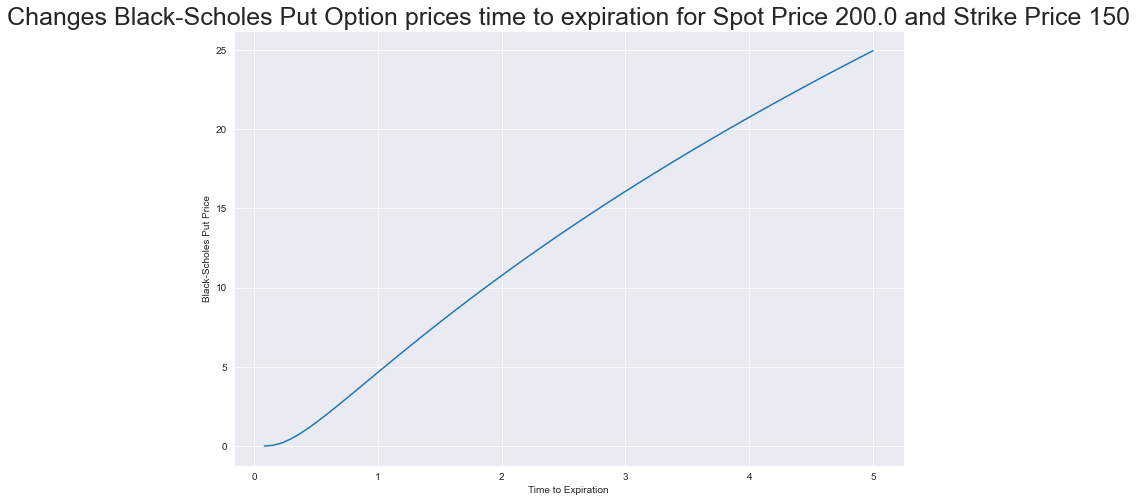

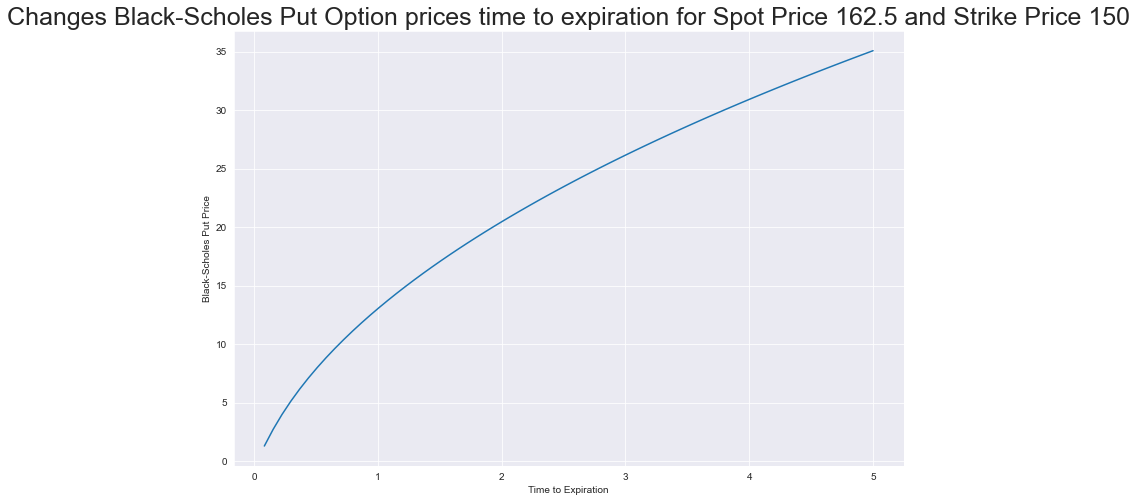

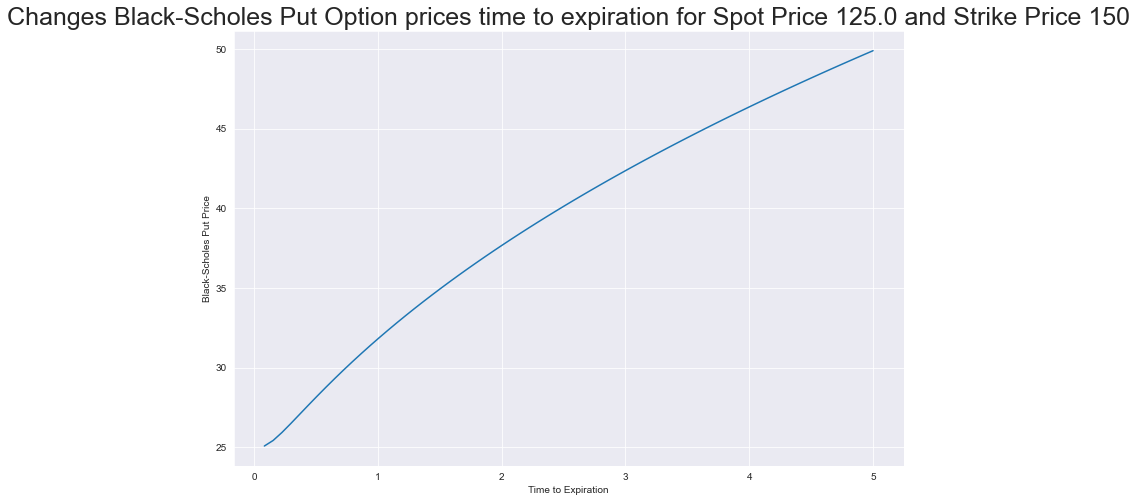

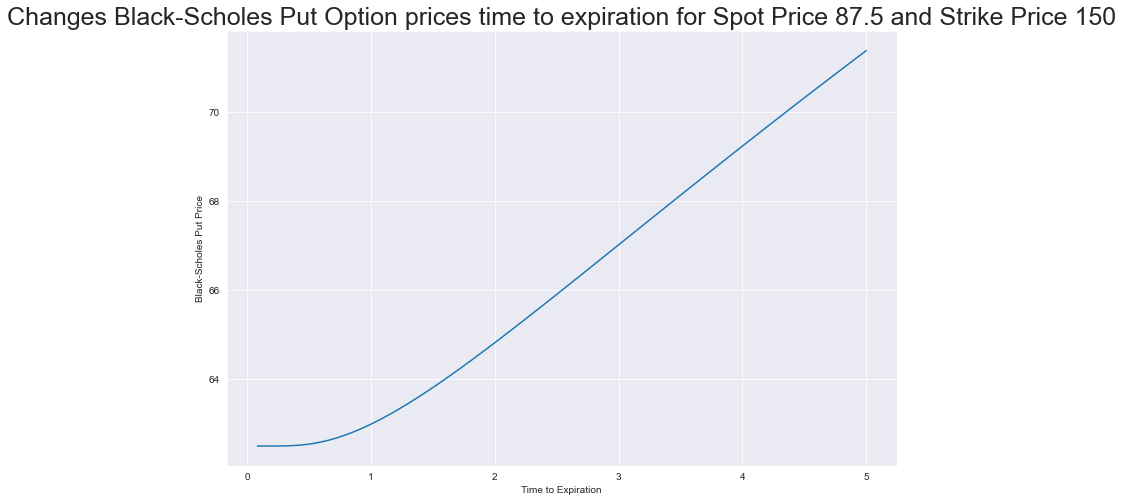

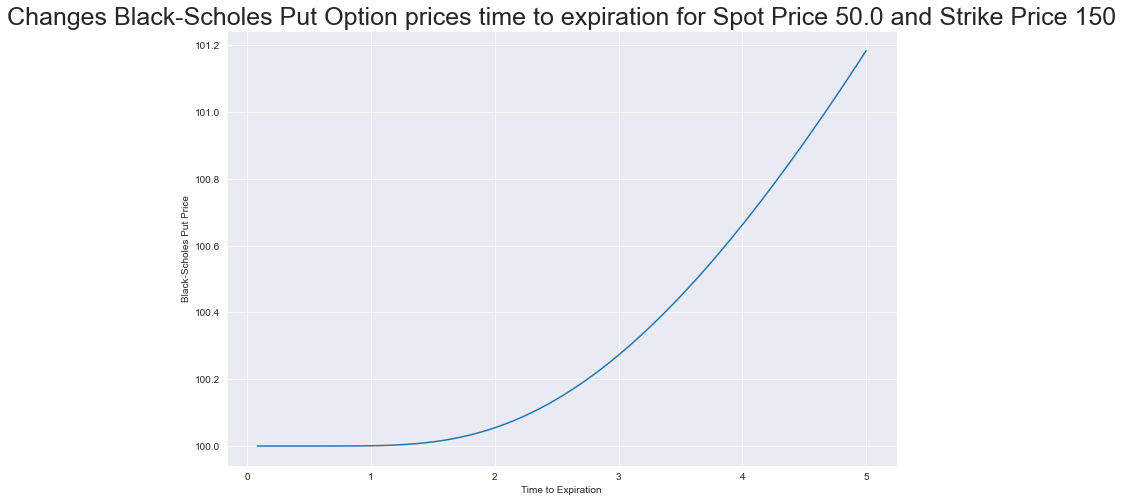

In [16]:
K = 150
sigma = .3
times = np.linspace(1/12, 5, 70)
spot_prices = np.linspace(200, 50, 5)

for spot_price in spot_prices:
    put_prices = [bs_put(spot_price,K,sigma, t = times[i]) for i in range(len(times))]
    plt.figure(figsize = (12,8))
    plt.title(f'Changes Black-Scholes Put Option prices time to expiration for Spot Price {spot_price} and Strike Price {K}', size = 25)

    plt.plot(times, put_prices)

    plt.xlabel('Time to Expiration')
    plt.ylabel('Black-Scholes Put Price')
    plt.show()

c.a) When the spot price is much lower than the strike price, the put option is deep in the money and has high intrinsic value. I observed that the put price is highest when the time to expiration is also large. This is because more time increases uncertainty, giving the option more opportunities to remain or become even more profitable. As a result, deep in the money puts with longer time to maturity show the highest values in the graph.



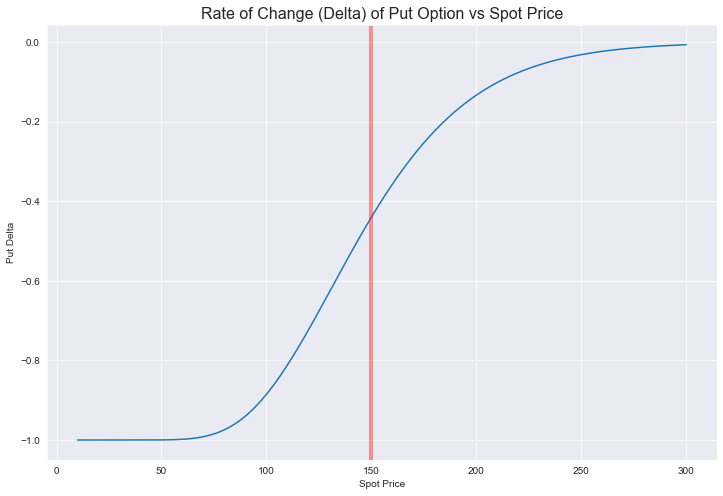

In [17]:
spot_prices = np.linspace(10, 300, 200)
put_deltas = [bs_put_delta(S, K, sigma, t=1, r=0) for S in spot_prices]

plt.figure(figsize=(12, 8))
plt.plot(spot_prices, put_deltas)
plt.axvline(K,color='red',label='Strike Price',alpha=.4, linewidth=4)
plt.title("Rate of Change (Delta) of Put Option vs Spot Price", fontsize=16)
plt.xlabel("Spot Price")
plt.ylabel("Put Delta")
plt.grid(True)
plt.show()

c.b) When the spot price is far below the strike price, the Delta of a put option is close to –1. This means the option is deep in the money and its price decreases almost dollar for dollar with increases in the spot price. As the spot price rises toward the strike, the Delta moves toward 0, reflecting reduced sensitivity. Once the spot price moves above the strike, the put becomes out of the money and largely unresponsive to further price increases. This illustrates how put options gradually lose sensitivity as they shift from in the money to out of the money territory.

d) The graphs show how both moneyness and time to expiration affect option prices and their sensitivity. Both call and put options show that Delta shifts sharply near the strike price: rising toward 1 for calls and dropping toward –1 for puts as they move deeper in the money. Meanwhile, more time to expiration increases an option’s value, but the marginal benefit diminishes with longer horizons.

Understanding Delta's shift as the spot price changes is also key for constructing hedging strategies. For example, when the Delta of a call option approaches 1, each option behaves almost like one share of stock. So, if we sold 10 call options, we’d buy approximately 10 shares of the stock to hedge, creating a delta-neutral position that offsets gains and losses in the underlying asset. 